In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('P3.csv')
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26-11-2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45,120.0,590.0,360.0,950
1,26-11-2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45,120.0,590.0,360.0,950
2,02-08-2013,2,August,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,5.0,45,120.0,369.0,225.0,594
3,02-08-2015,2,August,2015,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,7.0,45,120.0,517.0,315.0,832
4,02-09-2013,2,September,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,2.0,45,120.0,148.0,90.0,238


In [19]:
df.shape

(500, 18)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
scaler = StandardScaler()
df[['Unit_Cost', 'Revenue']] = scaler.fit_transform(df[['Unit_Cost', 'Revenue']])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df[['Unit_Cost']], df['Revenue'], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

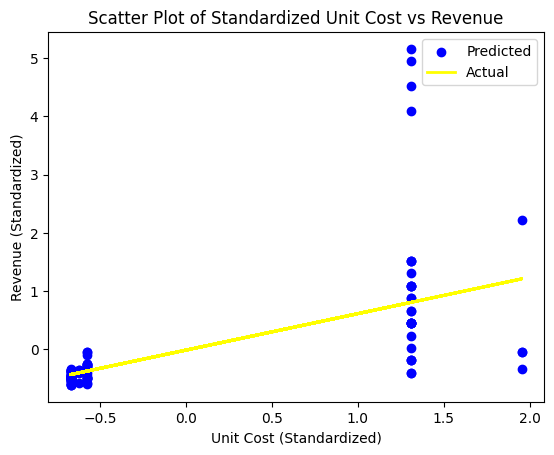

In [20]:
plt.scatter(X_test, y_test, color='blue', label='Predicted')
plt.plot(X_test, y_pred, color='yellow', linewidth=2,label='Actual')
plt.xlabel('Unit Cost (Standardized)')
plt.ylabel('Revenue (Standardized)')
plt.legend()
plt.title('Scatter Plot of Standardized Unit Cost vs Revenue')
plt.show()

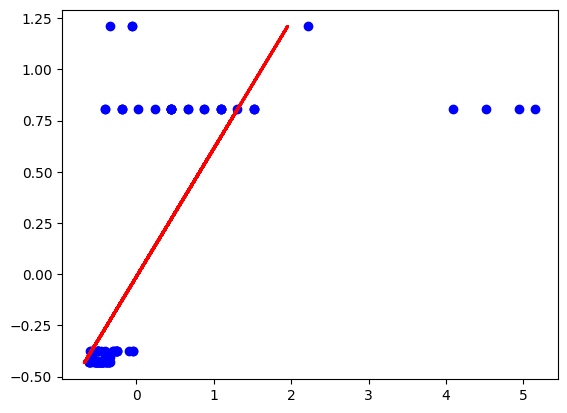

In [31]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot(X_test, y_pred, color='red', lw=2)
plt.show()

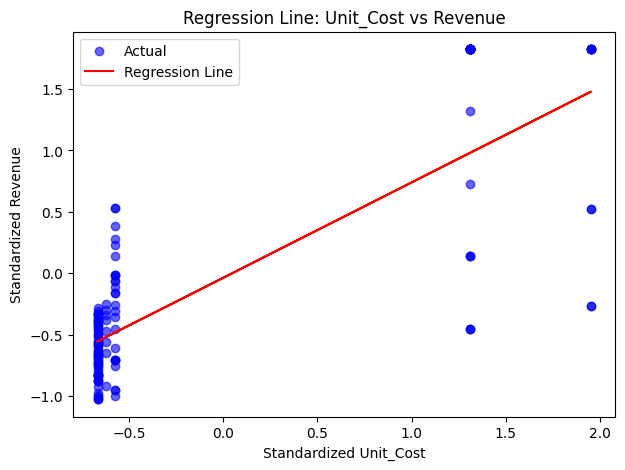

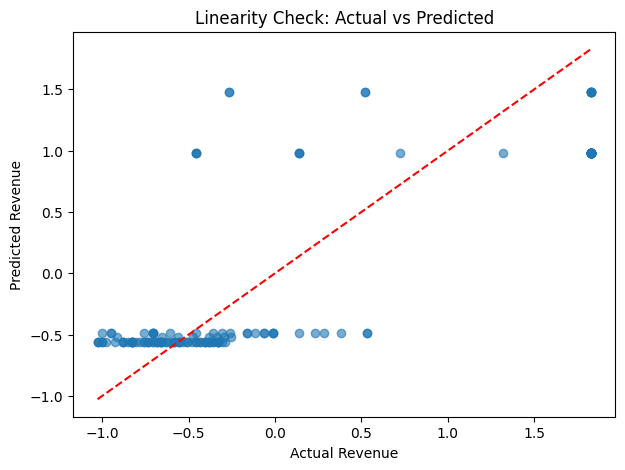

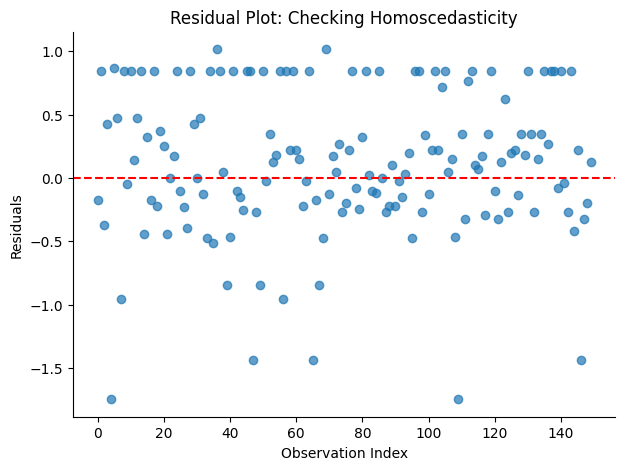

In [33]:
import pandas as pd
import numpy as np
import os, sys
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# IQR Winsorization Function
# ------------------------------
def iqr_winsorize(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)
    return df

# ------------------------------
# Load dataset
# ------------------------------
df = pd.read_csv('P3.csv')

# ------------------------------
# Select Required Columns
# ------------------------------
cols = ['Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Revenue']
df = df[cols]

# ------------------------------
# Missing Value Treatment
# ------------------------------
for c in cols:
    df[c] = df[c].fillna(df[c].mean())

# ------------------------------
# Outlier Treatment (IQR)
# ------------------------------
for c in cols:
    df = iqr_winsorize(df, c)

# ------------------------------
# Standard Scaling
# ------------------------------
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=cols)

# ------------------------------
# Prepare Features and Target
# ------------------------------
X = df_scaled[['Unit_Cost']]
y = df_scaled['Revenue']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ------------------------------
# Train Linear Regression Model
# ------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# ------------------------------
# Prepare for plots
# ------------------------------
X_test_pr = X_test
y_test_pr = y_test
y_pred_pr = y_pred
residuals = y_test_pr - y_pred_pr

# ------------------------------
# PLOT 1: Regression Line
# ------------------------------
plt.figure(figsize=(7,5))
plt.scatter(X_test_pr, y_test_pr, color='blue', alpha=0.6, label='Actual')
plt.plot(X_test_pr, y_pred_pr, color='red', label='Regression Line')
plt.xlabel("Standardized Unit_Cost")
plt.ylabel("Standardized Revenue")
plt.title("Regression Line: Unit_Cost vs Revenue")
plt.legend()
plt.show()

# ------------------------------
# PLOT 2: Linearity Check
# ------------------------------
plt.figure(figsize=(7,5))
plt.scatter(y_test_pr, y_pred_pr, alpha=0.6)
plt.plot([y_test_pr.min(), y_test_pr.max()],
         [y_test_pr.min(), y_test_pr.max()],
         color='red', linestyle='--')
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Linearity Check: Actual vs Predicted")
plt.show()

# ------------------------------
# PLOT 3: Homoscedasticity (Residual Plot)
# ------------------------------
plt.figure(figsize=(7,5))
plt.scatter(range(len(residuals)), residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
sns.despine(top=True, right=True)
plt.xlabel("Observation Index")
plt.ylabel("Residuals")
plt.title("Residual Plot: Checking Homoscedasticity")
plt.show()

# ------------------------------
# PLOT 4: Residual Distribution
# ------------------------------

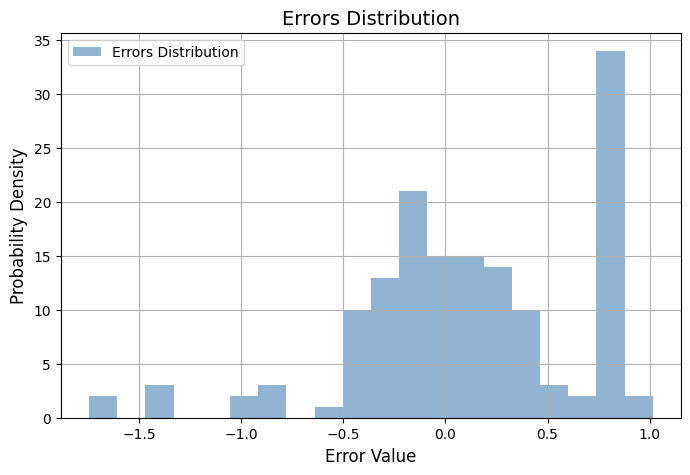

In [39]:
plt.figure(figsize=(8,5))

plt.hist(
    residuals,
    bins=20,
    color="steelblue",
    alpha=0.6,
    label="Errors Distribution"
)

plt.title("Errors Distribution", fontsize=14)
plt.xlabel("Error Value", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)

plt.legend()
plt.grid(True)

plt.show()
